In [196]:
from textblob.sentiments import PatternAnalyzer
from textblob import TextBlob
import pandas as pd
import re

In [197]:
def sentiment_parameters_Pattern(sentence):
    blob = TextBlob(sentence, analyzer=PatternAnalyzer())
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [198]:
df = pd.read_csv('reviews_yelp_api.csv', usecols=['Name', 'Rating','Description'])

In [283]:
id_coffee = []
coffee_store = []
rating = []
review = []
polarity_Pattern = []
subjectivity_Pattern = []

In [284]:
for i in range(df.shape[0]):
    data = df.iloc[i, 2]
    paragrahp = data.split('.')
    paragrahp = [sentence.strip() for sentence in paragrahp]
    for sentence in paragrahp:
        p, s = sentiment_parameters_Pattern(sentence)
        id_coffee.append(i)
        coffee_store.append(df.iloc[i, 0])
        rating.append(df.iloc[i, 1])
        review.append(sentence)
        polarity_Pattern.append(p)
        subjectivity_Pattern.append(s)

In [285]:
data_story1 = {'id': id_coffee, 'Coffee': coffee_store, 'Review': review, 'Rating': rating, 'Polarity_Pattern': polarity_Pattern, 'Subjectivity_Pattern': subjectivity_Pattern}
df_story1 = pd.DataFrame(data_story1)

In [286]:
df_story1 = df_story1[df_story1['Review']!= '']
df_story1['Review'] = [re.sub(r'[^a-zA-Z\s]','', sentence.lower()) for sentence in df_story1['Review']]

In [287]:
df_story_filtered = df_story1[df_story1['Review']!= '']

In [288]:
df_story_filtered 

,id,Coffee,Review,Rating,Polarity_Pattern,Subjectivity_Pattern
0,0,Four Barrel Coffee,in love with the look and vibes here at four b...,4.0,0.500000,0.600000
1,0,Four Barrel Coffee,big bar for you to order when you walk into th...,4.0,0.000000,0.100000
2,0,Four Barrel Coffee,theres a smaller station off to the side and,4.0,0.000000,0.500000
5,0,Four Barrel Coffee,amazing coffee,4.0,0.600000,0.900000
6,0,Four Barrel Coffee,but so so so freaking busy all the time and re...,4.0,0.133333,0.333333
7,0,Four Barrel Coffee,nnthis place is huge but its so crowded,4.0,0.400000,0.900000
10,0,Four Barrel Coffee,great vibe,4.0,0.800000,0.750000
11,0,Four Barrel Coffee,we love the decor and the environment created ...,4.0,0.500000,0.600000
12,0,Four Barrel Coffee,nncoffee was perfect done with professionalism...,4.0,0.406250,0.750000
16,1,Réveille Coffee Co.,love the vibe in this cozy little space its ch...,4.0,0.066406,0.537500


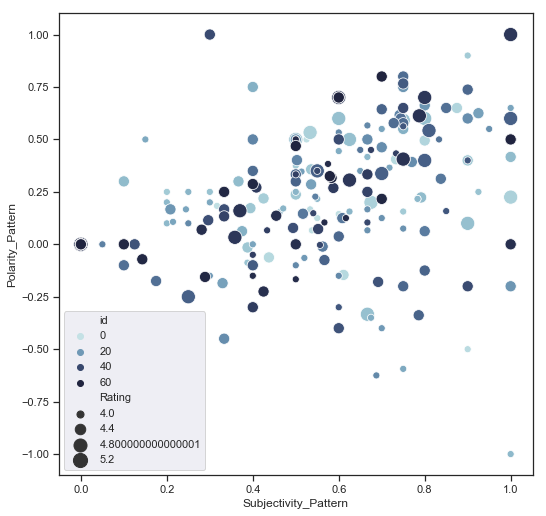

In [343]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8.5, 8.5))
#sns.despine(f, left=True, bottom=False)
sns.set()
data = df_story_filtered['Polarity_Pattern']

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y='Polarity_Pattern', x='Subjectivity_Pattern',
                     hue='id', size="Rating",
                     palette=cmap, sizes=(50, 200),
                     data=df_story_filtered)

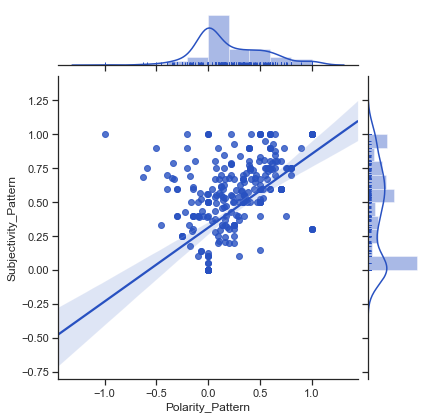

In [370]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

sns.jointplot(x='Polarity_Pattern', y='Subjectivity_Pattern', 
              data=df_story_filtered, kind='reg',
              marginal_kws=dict(bins=10, rug=True),
              #annot_kws=dict(stat="r"),
              #edgecolor="w", linewidth=1,
              color='#2851c1')

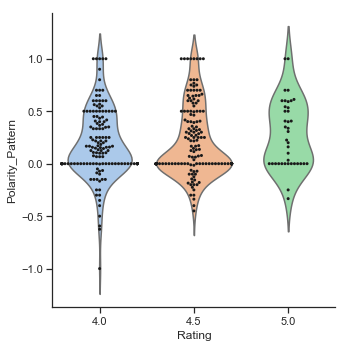

In [367]:
g = sns.catplot(x="Rating", y="Polarity_Pattern", kind="violin", data=df_story_filtered, inner=None, palette="pastel")
sns.swarmplot(x="Rating", y="Polarity_Pattern", color="k", size=3, data=df_story_filtered, ax=g.ax);